### Import Libraries

In [37]:
import quandl
import numpy as np
import pandas as pd
import seaborn as sns

from IPython import display
from matplotlib import style
from matplotlib import colors
from matplotlib import pyplot as plt
from scipy import optimize as opt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.2f}".format
style.use('fivethirtyeight')
np.random.seed(4200)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### API

In [38]:
with open("../../auth.txt") as my_api:
    key = my_api.read()

key = key.split("\n")
key = key[0]

quandl.ApiConfig.api_key = key

### Load Data

In [39]:
tickers = ["IBM", "AAPL", "GOOGL", "MSFT"]

data = quandl.get_table(
    "WIKI/PRICES",
    ticker=tickers,
    qopts={"columns": ["date", "ticker", "adj_close"]},
    date={"gte": "2015-1-1", "lte": "2017-12-31"},
    paginate=True,
)

dataframe = data.set_index("date")
dataframe = dataframe.pivot(columns="ticker")
print("{}\n".format(dataframe.columns))
dataframe.columns = [col[1] for col in dataframe.columns]
print("{}".format(dataframe.columns))
dataframe = pd.DataFrame(dataframe)
dataframe = dataframe.dropna()
display.display(dataframe.head(10))

MultiIndex(levels=[['adj_close'], ['AAPL', 'GOOGL', 'IBM', 'MSFT']],
           labels=[[0, 0, 0, 0], [0, 1, 2, 3]],
           names=[None, 'ticker'])

Index(['AAPL', 'GOOGL', 'IBM', 'MSFT'], dtype='object')


,AAPL,GOOGL,IBM,MSFT
date,,,,
2015-01-02,103.86,529.55,145.53,43.34
2015-01-05,100.94,519.46,143.24,42.94
2015-01-06,100.95,506.64,140.15,42.32
2015-01-07,102.36,505.15,139.24,42.85
2015-01-08,106.30,506.91,142.26,44.11
2015-01-09,106.41,500.72,142.88,43.74
2015-01-12,103.79,497.06,140.48,43.20
2015-01-13,104.71,501.80,140.82,42.97
2015-01-14,104.31,505.93,139.91,42.60


## Plot the Stocks and Compare

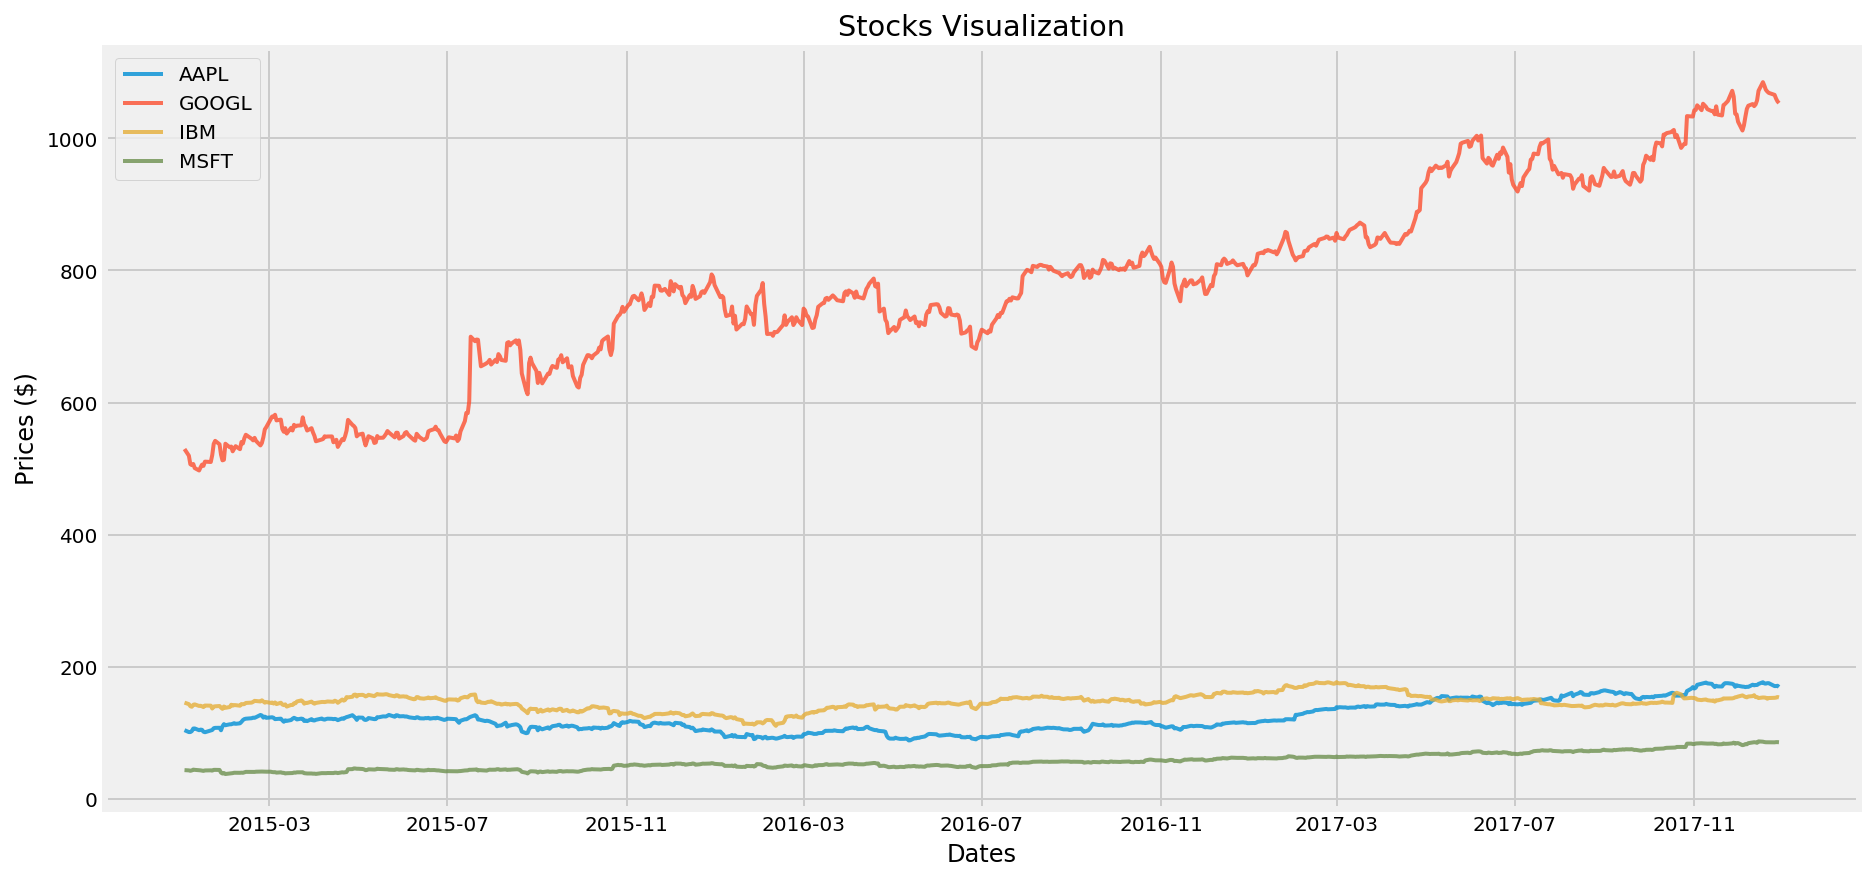

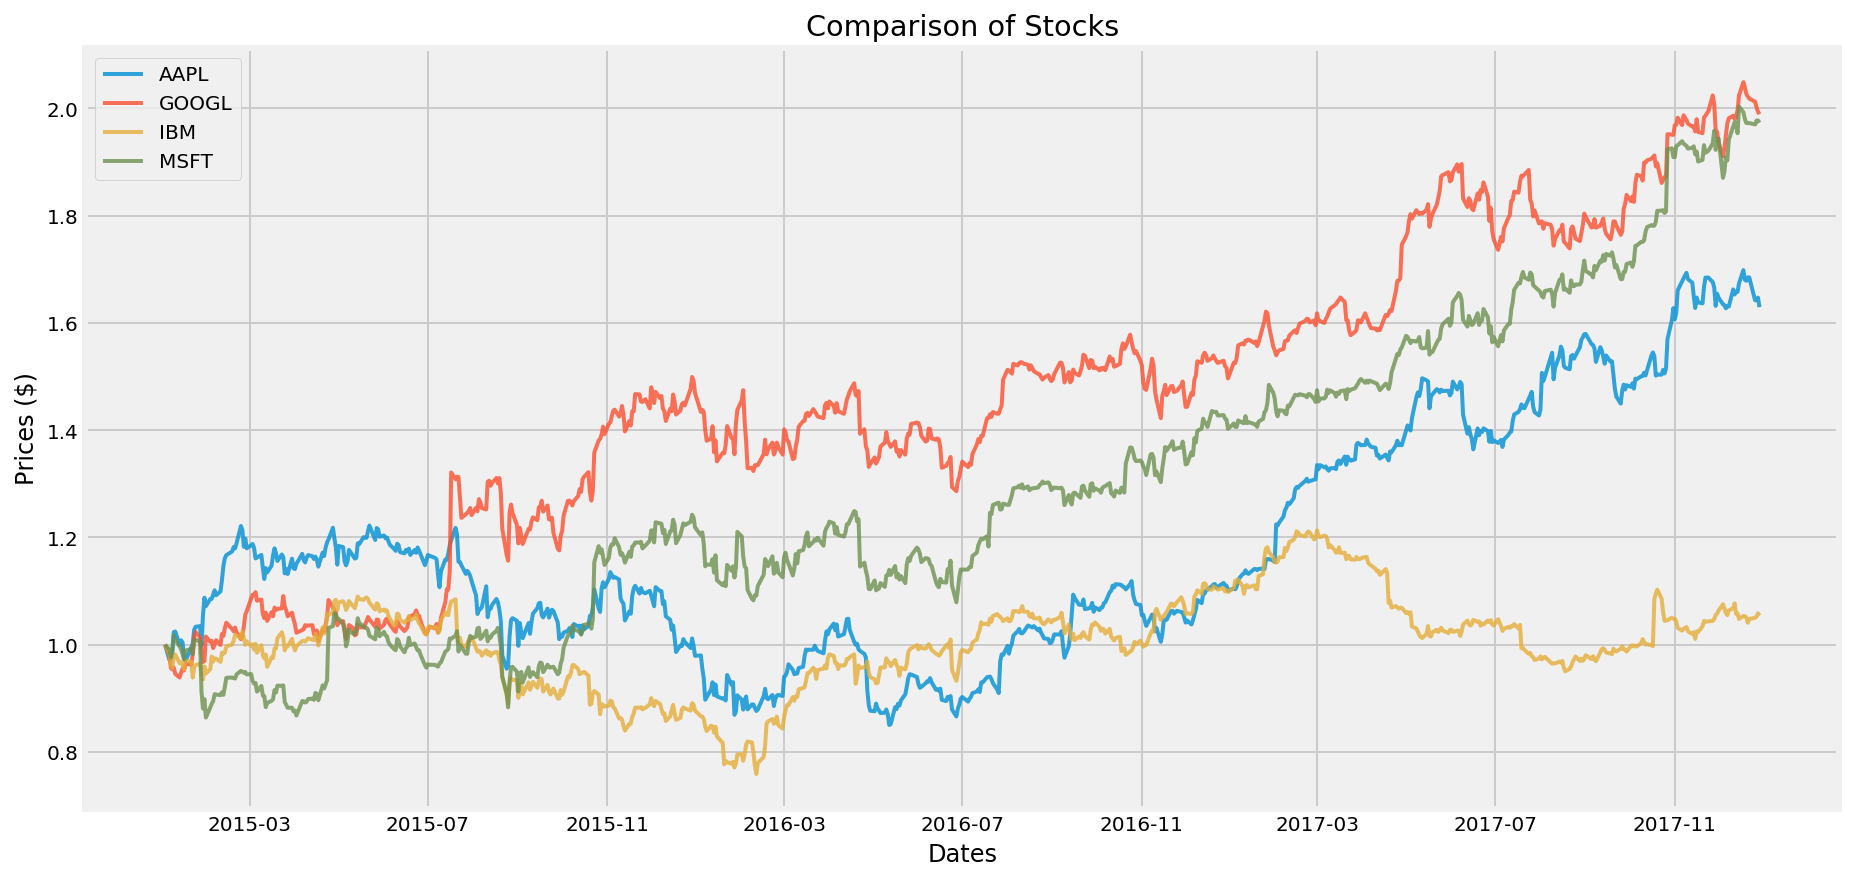

In [40]:
plt.figure(figsize=(14, 7))
for val in dataframe.columns.values:
    plt.plot(
        dataframe.index, dataframe[val], linewidth=2, alpha=0.8, label=val)
plt.title("Stocks Visualization")
plt.xlabel("Dates")
plt.ylabel("Prices ($)")
plt.legend()
plt.show()

compare_data = (dataframe / dataframe.iloc[0, :])
plt.figure(figsize=(14, 7))
for val in compare_data.columns.values:
    plt.plot(
        compare_data.index, compare_data[val], linewidth=2, alpha=0.8, label=val)
plt.title("Comparison of Stocks")
plt.xlabel("Dates")
plt.ylabel("Prices ($)")
plt.legend()
plt.show()

### Plot the Returns

,AAPL,GOOGL,IBM,MSFT
date,,,,
2015-01-02,0.00,0.00,0.00,0.00
2015-01-05,-0.03,-0.02,-0.02,-0.01
2015-01-06,0.00,-0.02,-0.02,-0.01
2015-01-07,0.01,-0.00,-0.01,0.01
2015-01-08,0.04,0.00,0.02,0.03
2015-01-09,0.00,-0.01,0.00,-0.01
2015-01-12,-0.02,-0.01,-0.02,-0.01
2015-01-13,0.01,0.01,0.00,-0.01
2015-01-14,-0.00,0.01,-0.01,-0.01


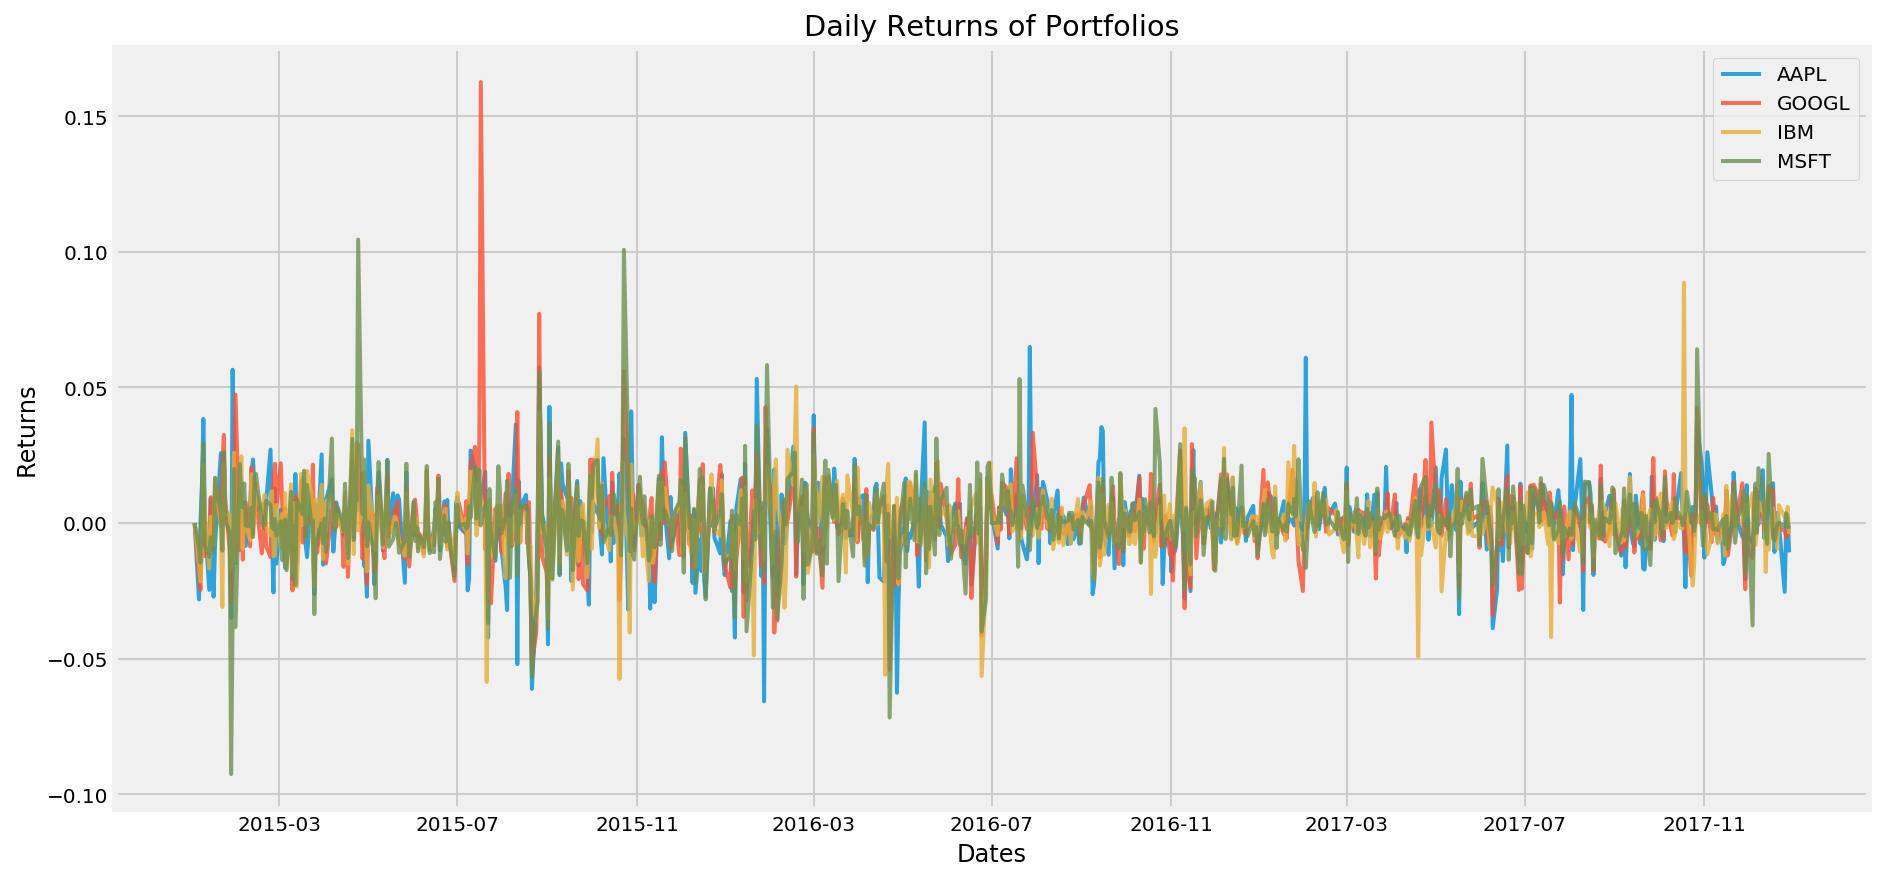

In [41]:
returns = dataframe.pct_change()                # Caluculates daily returns
returns.iloc[0, :] = 0                          # replaces nan with 0.00
display.display(returns.head(10))

plt.figure(figsize=(14, 7))
for val in returns.columns.values:
    plt.plot(
        returns.index, returns[val], linewidth=2, alpha=0.8, label=val)

plt.title("Daily Returns of Portfolios")
plt.ylabel("Returns")
plt.xlabel("Dates")
plt.legend()
plt.show()

### Plot Histograms

-------------------------------------
    Histogram Analysis of Tickers
-------------------------------------
      Mean of AAPL : 0.00075
      Std of AAPL : 0.01443
      Kurtosis of AAPL : 3.21134
-------------------------------------
      Mean of GOOGL : 0.00101
      Std of GOOGL : 0.01396
      Kurtosis of GOOGL : 25.46336
-------------------------------------
      Mean of IBM : 0.00014
      Std of IBM : 0.01199
      Kurtosis of IBM : 7.36575
-------------------------------------
      Mean of MSFT : 0.00100
      Std of MSFT : 0.01423
      Kurtosis of MSFT : 11.14599
-------------------------------------


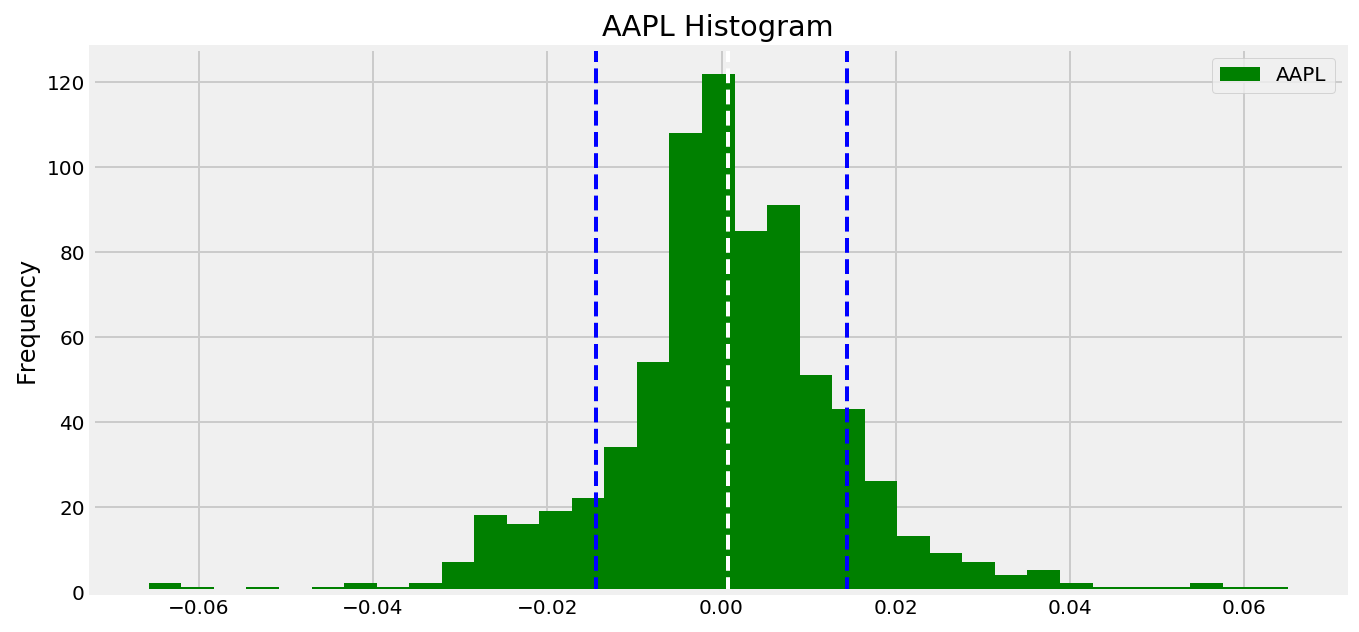

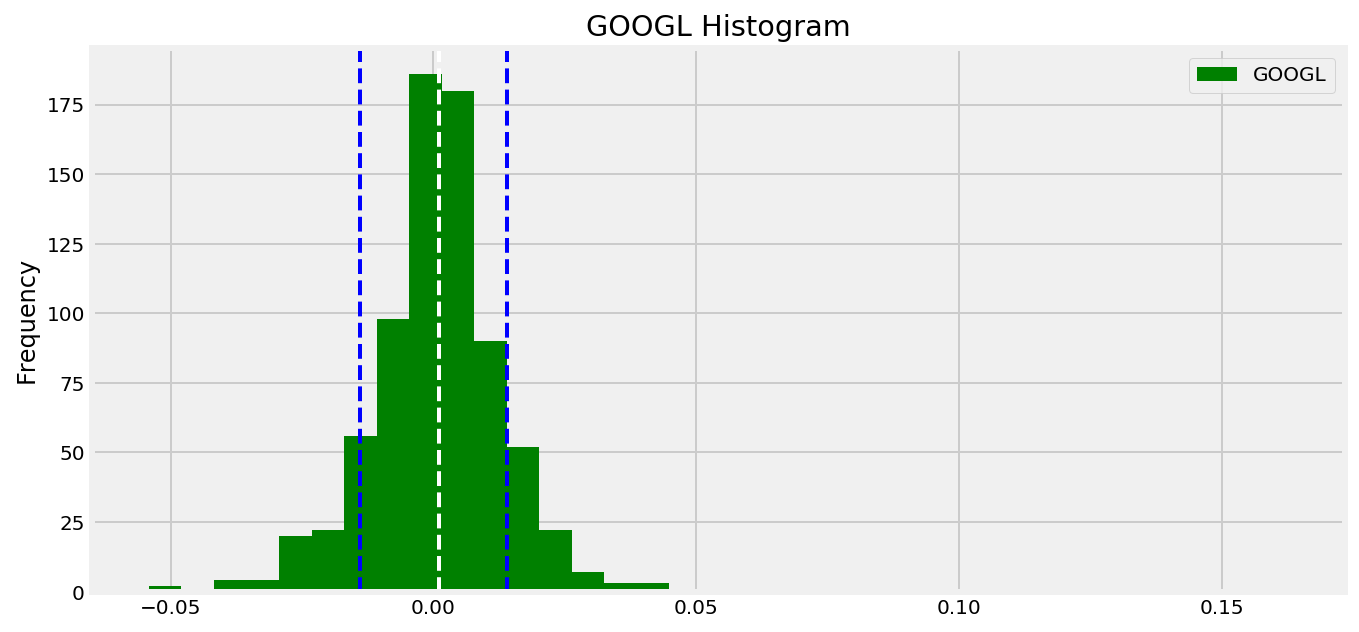

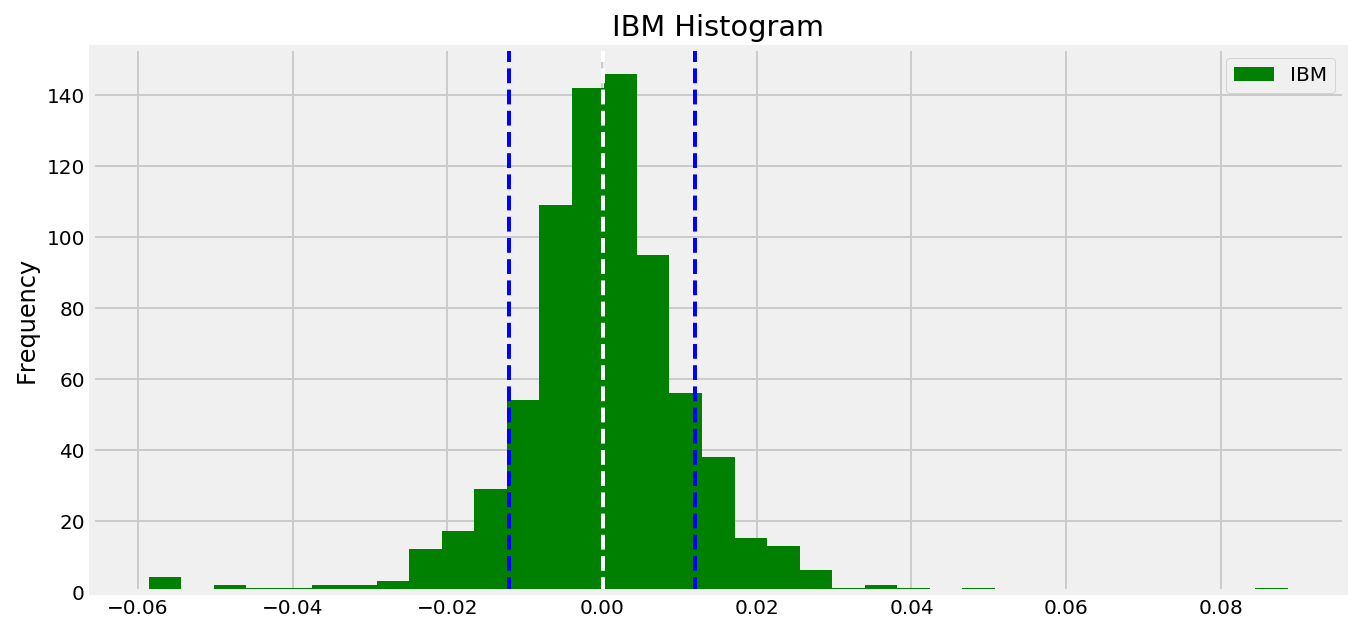

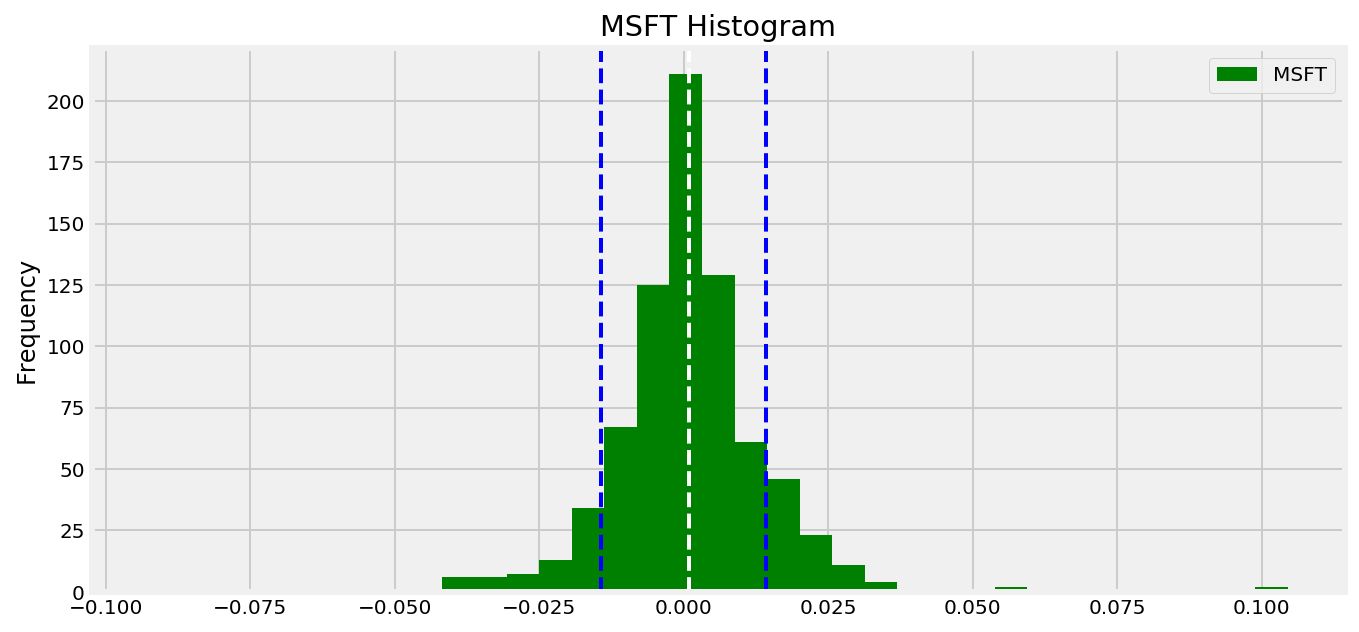

In [42]:
print("-" * 37)
print("    Histogram Analysis of Tickers")
print("-" * 37)

def hisogram_stats(val):
    print("      Mean of " + val + " : {:.5f}".
          format(returns[val].mean()))
    print("      Std of " + val + " : {:.5f}".
          format(returns[val].std()))
    print("      Kurtosis of " + val + " : {:.5f}".
          format(returns[val].kurtosis()))
    print("-" * 37)


for val in returns.columns:
    hisogram_stats(val=val)

    plt.figure(figsize=(10, 5))
    returns[val].plot.hist(
        label=val, bins=35, color="g")

    plt.axvline(
        returns[val].mean(), color="w", linewidth=2, linestyle="--")
    plt.axvline(
        returns[val].std(), color="b", linewidth=2, linestyle="--")
    plt.axvline(
        -returns[val].std(), color="b", linewidth=2, linestyle="--")

    plt.title(val + " Histogram")
    plt.legend()
plt.show()

### Correlation Matrix

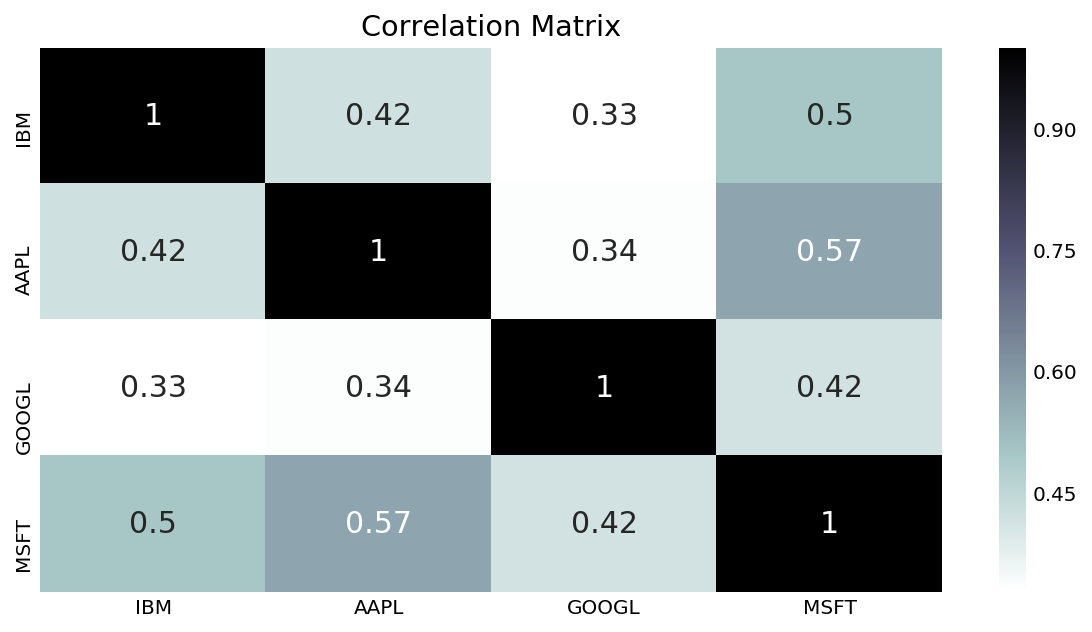

In [43]:
corr_returns = returns.corr(method="pearson")

plt.figure(figsize=(9, 5))
sns.heatmap(
    corr_returns,
    cbar=True,
    annot=True,
    annot_kws={"size": 15},
    xticklabels=tickers,
    yticklabels=tickers,
    cmap="bone_r"
)
plt.title("Correlation Matrix")
plt.show()

### Simulate Random Weights

In [44]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    """This function calculates annualised portfolio returns and volatility (risk).
    
    Parameters
    ----------
      `weights`: randomly generated weights for each stock in a portfolio
      `mean_returns`: mean of stock daily_returns
      `cov_matrix`: coeffecient matrix of all the daily_returns
    
    Returns
    -------
      Both annualised `standard_deviation` and `returns`.
    """
    annual_returns = np.sum(mean_returns*weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, annual_returns

#########################################################################################

def random_portfolio(
    mean_returns, 
    cov_matrix, 
    num_portfolios=10000, 
    risk_free_rate=0.00):
    
    """This function generates portfolios with random weights for each stock.
    
    Parameters
    ----------
      `mean_returns`: mean of stock daily_returns
      `cov_matrix`: coeffecient matrix of all daily_returns
      `num_portfolios`: default is `10000` but can be tuned
      `risk_free_rate`: default is `0.00` can vary from 0 through 1
    
    Returns
    -------
      `results` and `weights_record`.
    """
    
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.rand(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(
            weights=weights, mean_returns=mean_returns, cov_matrix=cov_matrix)
        
        results[0, i] = portfolio_std_dev
        results[1, i] = portfolio_return
        results[2, i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

### Parameters Values

In [45]:
returns = dataframe.pct_change()
returns.iloc[0, :] = 0.0
display.display(returns.head())

mean_returns = returns.mean()
display.display(mean_returns)

cov_matrix = returns.cov()
display.display(cov_matrix)

,AAPL,GOOGL,IBM,MSFT
date,,,,
2015-01-02,0.00,0.00,0.00,0.00
2015-01-05,-0.03,-0.02,-0.02,-0.01
2015-01-06,0.00,-0.02,-0.02,-0.01
2015-01-07,0.01,-0.00,-0.01,0.01
2015-01-08,0.04,0.00,0.02,0.03


AAPL    0.00
GOOGL   0.00
IBM     0.00
MSFT    0.00
dtype: float64

,AAPL,GOOGL,IBM,MSFT
AAPL,0.00,0.00,0.00,0.00
GOOGL,0.00,0.00,0.00,0.00
IBM,0.00,0.00,0.00,0.00
MSFT,0.00,0.00,0.00,0.00


### Portfolio Optimization Random Efficient Frontier

----------------------------------------------------------------------
  Maximum Sharpe ratio Portfolio Allocation

    Annualised Return : 0.246
    Annualised Volatility : 0.190


,AAPL,GOOGL,IBM,MSFT
allocation,23.71,20.24,18.47,37.58


----------------------------------------------------------------------
  Minimum Sharpe ratio Portfolio Allocation

    Annualised Return : 0.052
    Annualised Volatility : 0.183


,AAPL,GOOGL,IBM,MSFT
allocation,17.99,7.86,39.57,34.59


----------------------------------------------------------------------


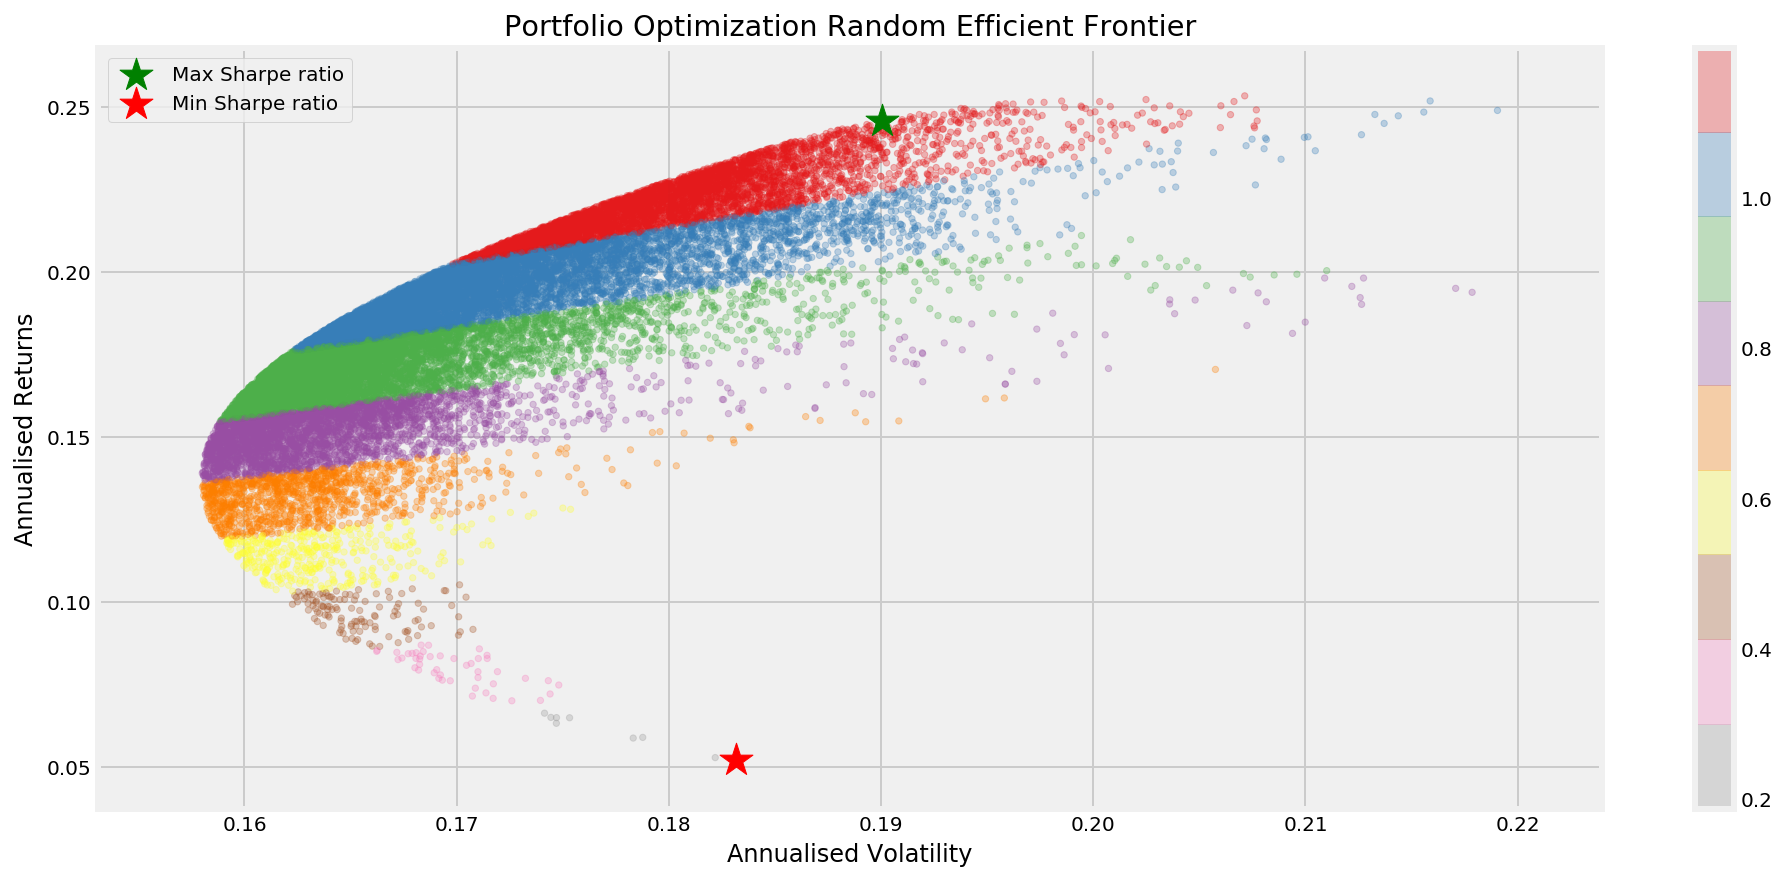

In [57]:
def portfolio_optimization_random_ef(
    mean_returns, 
    cov_matrix, 
    num_portfolios=10000, 
    risk_free_rate=0.00):
    
    """This function plots the random simulation of efficient frontier.
    
    Parameters
    ----------
      `mean_returns`: mean of stock daily_returns
      `cov_matrix`: coeffecient matrix of all daily_returns
      `num_portfolios`: default is `10000` but can be tuned
      `risk_free_rate`: default is `0.00` can vary from 0 through 1
    
    Prints
    ------
      Prints the summary of `portfolio` and `sharpe` results.
    
    Plots
    -----
      The simulation which is generated at random.
    """
    result, weights = random_portfolio(
        mean_returns=mean_returns,
        cov_matrix=cov_matrix,
        num_portfolios=25000,
        risk_free_rate=0.0178
    )
    
    max_sharpe_id = np.argmax(results[2])
    std, ret = results[0, max_sharpe_id], results[1, max_sharpe_id]
    max_sharpe_allocation = pd.DataFrame(
        weights[max_sharpe_id], index=dataframe.columns, columns=['allocation'])
    max_sharpe_allocation['allocation'] = max_sharpe_allocation['allocation'].apply(
        lambda x: round(x * 100, 2))
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_sharpe_id = np.argmin(results[2])
    std_min, ret_min = results[0, min_sharpe_id], results[1, min_sharpe_id]
    min_sharpe_allocation = pd.DataFrame(
        weights[min_sharpe_id], index=dataframe.columns, columns=['allocation'])
    min_sharpe_allocation['allocation'] = min_sharpe_allocation['allocation'].apply(
        lambda x: round(x * 100, 2))
    min_sharpe_allocation = min_sharpe_allocation.T
    
    print('-'*70)
    print("  Maximum Sharpe ratio Portfolio Allocation\n")
    print("    Annualised Return : {:.3f}".format(ret))
    print("    Annualised Volatility : {:.3f}".format(std))
    display.display(max_sharpe_allocation)
    print('-'*70)
    print("  Minimum Sharpe ratio Portfolio Allocation\n")
    print("    Annualised Return : {:.3f}".format(ret_min))
    print("    Annualised Volatility : {:.3f}".format(std_min))
    display.display(min_sharpe_allocation)
    print('-'*70)
    
    plt.figure(figsize=(15, 7))
    plt.scatter(
        results[0, :], results[1, :], c=results[2, :], cmap='Set1_r', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(std, ret, marker='*', s=300, c='g', label='Max Sharpe ratio')
    plt.scatter(std_min, ret_min, marker='*', s=300, c='r', label='Min Sharpe ratio')
    plt.title('Portfolio Optimization Random Efficient Frontier')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend()
    plt.show()

portfolio_optimization_random_ef(
    mean_returns=mean_returns,
    cov_matrix=cov_matrix,
    num_portfolios=25000,
    risk_free_rate=0.0178
)